In [5]:
# 4개의 데이터 셋을 간단히 살펴보기
uselog = pd.read_csv("./pyda100-master/Chapter_3/use_log.csv")
display(uselog.head())
print("use_log 데이터 셋 내 데이터 갯수 :", len(uselog))

customer = pd.read_csv("./pyda100-master/Chapter_3/customer_master.csv")
display(customer.head())
print("customer 데이터 셋 내 데이터 갯수 :", len(customer))

class_master = pd.read_csv("./pyda100-master/Chapter_3/class_master.csv")
display(class_master.head())
print("class_master 데이터 셋 내 데이터 갯수 :", len(class_master))

campaign_master = pd.read_csv("./pyda100-master/Chapter_3/campaign_master.csv")
display(campaign_master.head())
print("campaign_master 데이터 셋 내 데이터 갯수 :", len(campaign_master))



,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


use_log 데이터 셋 내 데이터 갯수 : 197428


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


customer 데이터 셋 내 데이터 갯수 : 4192


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


class_master 데이터 셋 내 데이터 갯수 : 3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


campaign_master 데이터 셋 내 데이터 갯수 : 3


In [15]:
# 'customer'데이터 셋과 'class_master'데이터 셋 join 실시 후, 해당 데이터 셋 파악
customer_join = pd.merge(customer, class_master, on = "class", how = "left")
customer_join = pd.merge(customer_join, campaign_master, on = "campaign_id", how = "left")
customer_join = customer_join.loc[:, ["customer_id", "gender", "start_date", "end_date", "is_deleted", "class", "class_name", "campaign_id", "campaign_name"]]
display(customer_join.head())
print("customer_join 데이터 셋 내 데이터 갯수 :", len(customer_join))

,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name
0,OA832399,F,2015-05-01 00:00:00,NaN,0,C01,0_종일,CA1,2_일반
1,PL270116,M,2015-05-01 00:00:00,NaN,0,C01,0_종일,CA1,2_일반
2,OA974876,M,2015-05-01 00:00:00,NaN,0,C01,0_종일,CA1,2_일반
3,HD024127,F,2015-05-01 00:00:00,NaN,0,C01,0_종일,CA1,2_일반
4,HD661448,F,2015-05-01 00:00:00,NaN,0,C03,2_야간,CA1,2_일반


customer_join 데이터 셋 내 데이터 갯수 : 4192


In [17]:
# 'customer_join' 데이터 셋 내 null 데이터 갯수 확인
customer_join.isnull().sum()

customer_id         0
gender              0
start_date          0
end_date         2842
is_deleted          0
class               0
class_name          0
campaign_id         0
campaign_name       0
dtype: int64

In [19]:
# class별 고객수 집계
display(customer_join.groupby("class_name").count()["customer_id"])

# campaign별 고객수 집계
display(customer_join.groupby("campaign_name").count()["customer_id"])

# gender별 고객수 집계
display(customer_join.groupby("gender").count()["customer_id"])

# is_deleted(삭제여부)별 고객수 집계
display(customer_join.groupby("is_deleted").count()["customer_id"])


class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

gender
F    1983
M    2209
Name: customer_id, dtype: int64

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [26]:
# 'start_date'별 고객수 집계
temp_customer_join = customer_join.loc[:, ["customer_id", "start_date"]]
temp_customer_join["start_date"] = pd.to_datetime(temp_customer_join["start_date"]).dt.strftime("%Y%m")
temp_customer_join.groupby("start_date").count()["customer_id"]

start_date
201505     62
201506     69
201507     53
201508     53
201509     71
201510     54
201511     63
201512     67
201601     56
201602     48
201603     55
201604     57
201605     56
201606     76
201607     69
201608     77
201609     75
201610     71
201611     65
201612     76
201701     75
201702     74
201703     72
201704     99
201705    105
201706     95
201707    100
201708    122
201709    115
201710     98
201711    108
201712    160
201801    122
201802    104
201803     94
201804    175
201805    193
201806    166
201807    135
201808    102
201809     88
201810     66
201811     65
201812    157
201901     90
201902     74
201903     65
Name: customer_id, dtype: int64

In [29]:
# '20180401'이후에 신규 가입을 한 고객수 집계
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401"), :]
print("'2018.04.01'이후로 신규 가입을 한 고객수 :", len(customer_start))

'2018.04.01'이후로 신규 가입을 한 고객수 : 1361


In [30]:
# 'end_date'에 탈퇴일이 저장되는 방식 파악 
flg_for_not_end = customer_join["end_date"].isnull()
customer_join.loc[~flg_for_not_end, ["end_date"]]

,end_date
708,2018-04-30 00:00:00
729,2018-04-30 00:00:00
730,2018-04-30 00:00:00
770,2018-05-31 00:00:00
785,2018-05-31 00:00:00
813,2018-05-31 00:00:00
837,2018-05-31 00:00:00
846,2018-04-30 00:00:00
847,2018-05-31 00:00:00
857,2018-05-31 00:00:00


In [32]:
# 2019년 3월의 고객 데이터만 추출
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isnull()), :]
display(customer_newer.head())
print("'2019.03'월에 대한 고객수 :", len(customer_newer))


,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name
0,OA832399,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반
1,PL270116,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반
2,OA974876,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반
3,HD024127,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반
4,HD661448,F,2015-05-01,NaT,0,C03,2_야간,CA1,2_일반


'2019.03'월에 대한 고객수 : 2953


In [33]:
# customer_newr 데이터 셋 내 'end_date'컬럼에 저장된 고유한 데이터 값 파악
customer_newer["end_date"].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [34]:
# class별 2019년 3월의 고객수 집계
display(customer_newer.groupby("class_name").count()["customer_id"])

# campaign별 2019년 3월의 고객수 집계
display(customer_newer.groupby("campaign_name").count()["customer_id"])

# gender별 2019년 3월의 고객수 집계
display(customer_newer.groupby("gender").count()["customer_id"])

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [39]:
# 고객별 월 이용 횟수 count
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["year_month"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["year_month", "customer_id"], as_index=False).count()
uselog_months.rename(columns = {"log_id" : "count"}, inplace = True)
del uselog_months["usedate"]
uselog_months.head()

,year_month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [44]:
# 고객별 월별 이용 횟수 평균값, 중앙값, 최대값, 최솟값 집계
customer_uselog_agg = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
customer_uselog_agg = customer_uselog_agg.reset_index(drop=False)
customer_uselog_agg.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [48]:
uselog.head()

,log_id,customer_id,usedate,year_month,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [61]:
# 고객별 월별&요일별 이용 횟수 count
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "year_month", "weekday"]).count()
uselog_weekday.reset_index(drop=False, inplace=True)
del uselog_weekday["usedate"]
uselog_weekday.rename(columns = {"log_id" : "count"}, inplace = True)
uselog_weekday.head()

,customer_id,year_month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [65]:
# customer_id로 groupby한 후, count가 4이상인 레코드 파악
uselog_weekday = uselog_weekday.groupby("customer_id", as_index = False).max().loc[:, ["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
# uselog_weekday.head()
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [66]:
# 'customer_join'과 'customer_uselog_agg', 'uselog_weekday'를 join 실시
customer_join = pd.merge(customer_join, customer_uselog_agg, on = "customer_id", how = "left")
customer_join = pd.merge(customer_join, uselog_weekday.loc[:, ["customer_id", "routine_flg"]], on = "customer_id", how = "left")
customer_join.head()

,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name,mean,median,max,min,routine_flg
0,OA832399,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.833333,5.0,8,2,1
1,PL270116,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,5.083333,5.0,7,3,1
2,OA974876,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.583333,5.0,6,3,1
3,HD024127,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.833333,4.5,7,2,1
4,HD661448,F,2015-05-01,NaT,0,C03,2_야간,CA1,2_일반,3.916667,4.0,6,1,1


In [68]:
# 'customer_join'레코드의 결측치 확인
customer_join.isna().sum()

customer_id         0
gender              0
start_date          0
end_date         2842
is_deleted          0
class               0
class_name          0
campaign_id         0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [81]:
# 고객별 회원기간 컬럼(membership_period) 추가
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join.head()
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
    display(customer_join["membership_period"].iloc[i])
    
customer_join.head()

,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,M,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,F,2015-05-01,NaT,0,C01,0_종일,CA1,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,F,2015-05-01,NaT,0,C03,2_야간,CA1,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [82]:
# 고객 한 명당 월 평균 이용횟수
customer_join.loc[:, ["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [89]:
# 정기적으로 이용하는 고객수와 그렇지 못한 고객수 파악
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

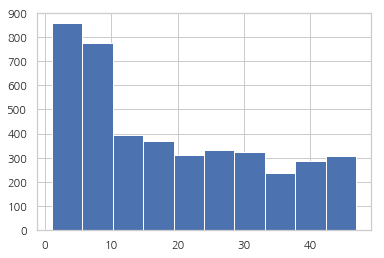

In [91]:
# 회원 기간에 대한 히스토그램
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [92]:
# 탈퇴 회원의 데이터 샛과 지속 회원의 데이터 셋 비교
customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
display(customer_end.describe())

customer_stay = customer_join.loc[customer_join["is_deleted"] == 0]
display(customer_stay.describe())

,is_deleted,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


,is_deleted,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [93]:
customer_join.to_csv("customer_join.csv", index = False)